Circular ensemble of the random matrices

In [1]:
import numpy as np
import numpy.linalg as nlg
import scipy as sc
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [2]:
from skrmt.ensemble import CircularEnsemble

In [94]:
############## Circular orthogonal ensemble ####################
n = 200
ens = 1000  # ens
eigphall = []
eigvals = []
spacing_ratios = []
# Generate a matrix from the CUE 
for i in tqdm(range(ens)):
    coe = CircularEnsemble(beta=1, n = n)
    Hcoe = coe.matrix
    eig = nlg.eigvals(Hcoe)
    eigph = np.angle(eig)
    eigso = np.sort(eigph)
    for j in range(len(eig)-2):
    #spacings = np.diff(eigs)
        sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
        spacing_ratios.append(sratio)
    eigvals.append(eig)
    eigphall.append(eigph)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [95]:
e1 = np.array(eigvals).flatten()
e2 = np.array(eigphall).flatten()

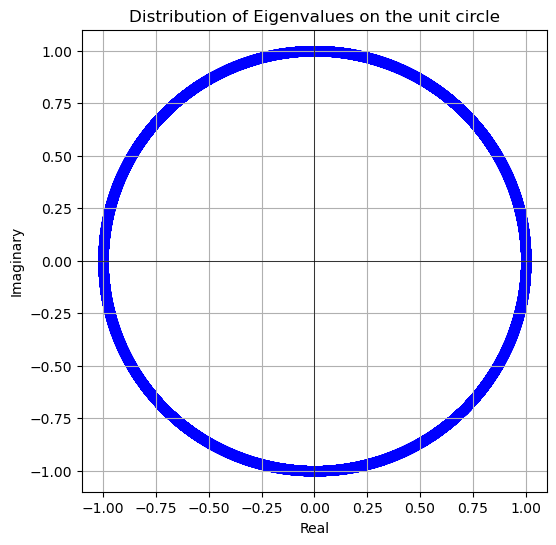

In [96]:
plt.figure(figsize=(6, 6))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Distribution of Eigenvalues on the unit circle")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.show()

In [97]:
x = np.linspace(0, 10, 1000)
prgoe = 27*x*(x+1)/(8*(x** 2 + x + 1)**(5/2)) 
prgue = 81*np.sqrt(3)*x**2*(x+1)**2/(4*np.pi*(x ** 2 + x + 1)**(4)) 
prpoi = 1/(x+1)**2

(array([0.31558972, 0.31762825, 0.31762825, 0.31469787, 0.32756608,
        0.31316897, 0.32132309, 0.32043123, 0.31648158, 0.32106827,
        0.31597195, 0.3183927 , 0.31724603, 0.31546232, 0.32055864,
        0.31406083, 0.32196013, 0.32259717, 0.32106827, 0.31508009,
        0.32501792, 0.31329638, 0.31775566, 0.32246976, 0.31877493,
        0.31393342, 0.31508009, 0.31979419, 0.32030382, 0.31852011,
        0.31826529, 0.31457046, 0.32361643, 0.31227712, 0.3215779 ,
        0.31852011, 0.31584454, 0.31342379, 0.32068605, 0.32068605]),
 array([-1.57079633, -1.49225651, -1.41371669, -1.33517688, -1.25663706,
        -1.17809725, -1.09955743, -1.02101761, -0.9424778 , -0.86393798,
        -0.78539816, -0.70685835, -0.62831853, -0.54977871, -0.4712389 ,
        -0.39269908, -0.31415927, -0.23561945, -0.15707963, -0.07853982,
         0.        ,  0.07853982,  0.15707963,  0.23561945,  0.31415927,
         0.39269908,  0.4712389 ,  0.54977871,  0.62831853,  0.70685835,
         0.78539

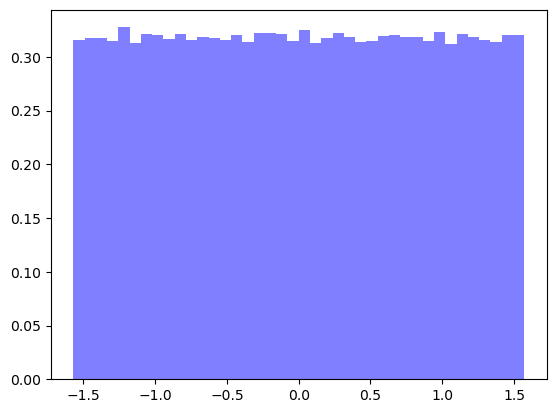

In [98]:
plt.hist(e2,range = [-np.pi/2,np.pi/2],  bins=40, density=True, alpha=0.5, color='blue')

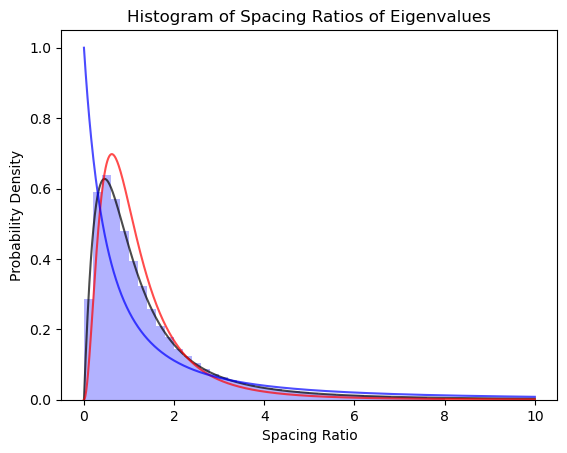

In [99]:
# Plot the spacing ratios
plt.hist(spacing_ratios,range = [0,8],  bins=40, density=True, alpha=0.3, color='blue')
plt.plot(x,prgoe,alpha=0.7, color='black')
plt.plot(x,prgue,alpha=0.7, color='red')
plt.plot(x,prpoi,alpha=0.7, color='blue')
plt.xlabel('Spacing Ratio')
plt.ylabel('Probability Density')
plt.title('Histogram of Spacing Ratios of Eigenvalues')
plt.grid(False)
plt.show()

In [72]:
############## Circular unitary ensemble ####################

#############Eigenvalue distribution and the spacing ratio of the phases #######

n = 100
ens = 5000  # ens
eigphall = []
eigvals = []
spacing_ratios = []
# Generate a matrix from the CUE 
for i in tqdm(range(ens)):
    coe = CircularEnsemble(beta=2, n = n)
    Hcoe = coe.matrix
    eig = nlg.eigvals(Hcoe)
    eigph = np.angle(eig)
    eigso = np.sort(eigph)
    for j in range(len(eig)-2):
    #spacings = np.diff(eigs)
        sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
        spacing_ratios.append(sratio)
    eigvals.append(eig)
    eigphall.append(eigph)

  0%|          | 0/5000 [00:00<?, ?it/s]

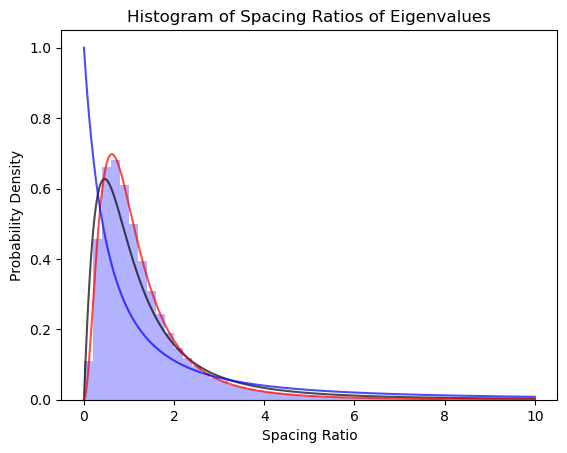

In [73]:
# Plot the spacing ratios
plt.hist(spacing_ratios,range = [0,8],  bins=40, density=True, alpha=0.3, color='blue')
plt.plot(x,prgoe,alpha=0.7, color='black')
plt.plot(x,prgue,alpha=0.7, color='red')
plt.plot(x,prpoi,alpha=0.7, color='blue')
plt.xlabel('Spacing Ratio')
plt.ylabel('Probability Density')
plt.title('Histogram of Spacing Ratios of Eigenvalues')
plt.grid(False)
plt.show()

In [75]:
def CSR(eigv):
    grd = []
    kdt_eigv = np.stack([np.real(eigv), np.imag(eigv)], axis=-1)
    kdt = cKDTree(kdt_eigv)
    for j in range(n):
        dists, indices = kdt.query(kdt_eigv[j], 3)
        nns = eigv[indices]
        grd.append((nns[1] - eigv[j]) / (nns[2] - eigv[j]))
    return grd

In [90]:
########### Complex spacing ratio for the eigenvalues of the CUE ######################
n = 100
ens = 10000  # ens
grdt = []
# Generate a matrix from the CUE 
for i in tqdm(range(ens)):
    cue = CircularEnsemble(beta=2, n = n)
    Hcue = cue.matrix
    eig = nlg.eigvals(Hcue)
    CSRcirc = CSR(eig)
    grdt.append(CSRcirc)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [91]:
e2 = np.array(grdt).flatten()

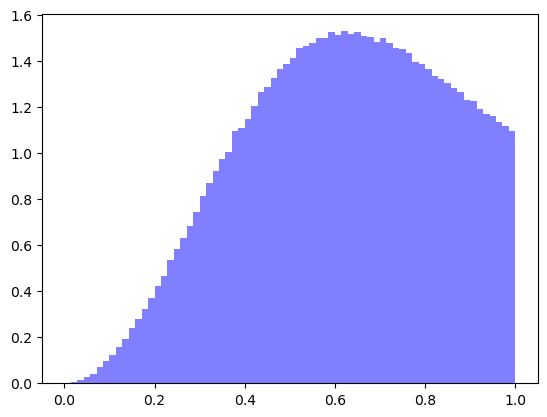

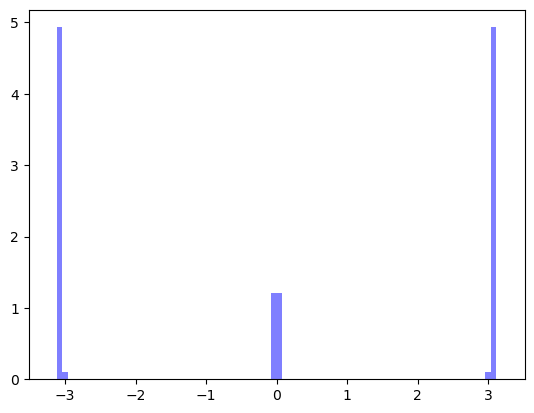

In [92]:
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e2),range = [0,1.0],  bins = 70, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e2),range = [-3.2,3.2],  bins = 80, density=True, alpha=0.5, color='blue')
plt.show()

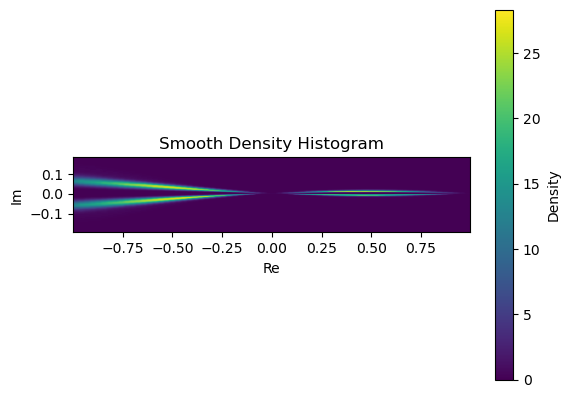

In [93]:
########### the heat map complex list plot for the complex spacing ratios######################
# Example data, replace this with your data
x = np.real(e2)
y = np.imag(e2)
# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=70, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Smooth Density Histogram')
plt.show()

In [86]:
########### Complex spacing ratio for the eigenvalues of the COE ######################
n = 100
ens = 5000  # ens
grdt = []
# Generate a matrix from the CUE 
for i in tqdm(range(ens)):
    coe = CircularEnsemble(beta=1, n = n)
    Hcoe = coe.matrix
    eig = nlg.eigvals(Hcoe)
    CSRcirc = CSR(eig)
    grdt.append(CSRcirc)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [87]:
e3 = np.array(grdt).flatten()

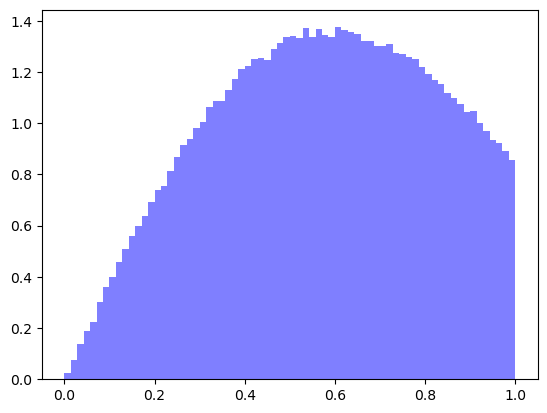

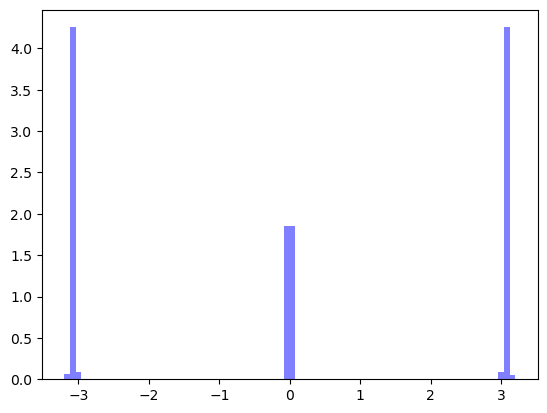

In [88]:
#############The radial marginal distribution for the CSR (p(r) vs r)########################
plt.hist(np.abs(e3),range = [0,1.0],  bins = 70, density=True, alpha=0.5, color='blue')
plt.show()
##############The angular marginal distribution for the CSR (p(theta) vs theta)#####################
plt.hist(np.angle(e3),range = [-3.2,3.2],  bins = 80, density=True, alpha=0.5, color='blue')
plt.show()

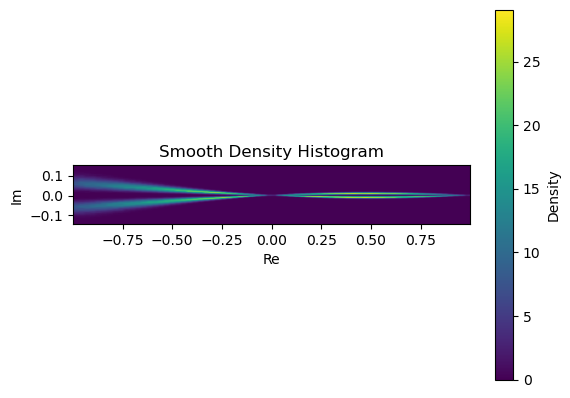

In [89]:
########### the heat map complex list plot for the complex spacing ratios######################
# Example data, replace this with your data
x = np.real(e3)
y = np.imag(e3)
# Calculate 2D histogram
heatmap, xedges, yedges = np.histogram2d(x, y, bins=70, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plot smooth density histogram
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Smooth Density Histogram')
plt.show()